## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [7]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?
   There are 8219 rows and 4 columns

In [9]:
print(gdp_df.shape)

(8219, 4)


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [11]:
del gdp_df['Value Footnotes']


In [12]:
gdp_df_clean=gdp_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'GDP_Per_Capita'})

In [13]:
gdp_df_clean.head()


,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [15]:
num_yrs=gdp_df.nunique(axis=0)
print(num_yrs)

Country or Area     247
Year                 34
Value              8174
dtype: int64


In [16]:
num_yrs_by_country=gdp_df['Country or Area'].value_counts()
num_yrs_by_country.head()

Country or Area
Latvia           34
North America    34
Mongolia         34
Morocco          34
Mozambique       34
Name: count, dtype: int64

In [17]:
num_yrs_by_country_missing_data=num_yrs_by_country[num_yrs_by_country<34]
print(num_yrs_by_country_missing_data)

Country or Area
Bhutan                       33
Syrian Arab Republic         33
Somalia                      33
Tonga                        33
Lebanon                      33
Greenland                    32
West Bank and Gaza           30
Serbia                       29
Montenegro                   27
San Marino                   26
CuraÃ§ao                     24
Afghanistan                  24
Virgin Islands               21
Cayman Islands               18
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, dtype: int64


228 countries have data for all 34 years.  19 countries are missing data.  They are listed above.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


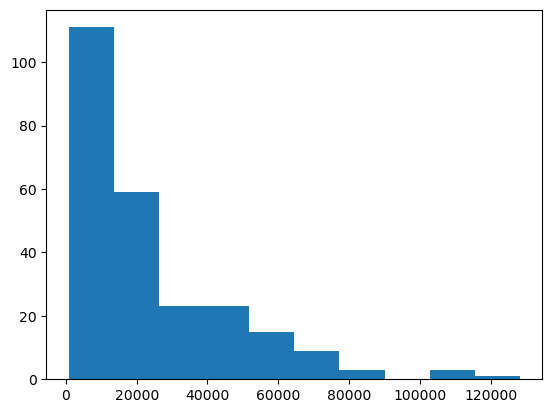

In [20]:
gdp_df_clean_2020=gdp_df_clean.query('Year==2020')
plt.hist(gdp_df_clean_2020['GDP_Per_Capita'])
plt.show()

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

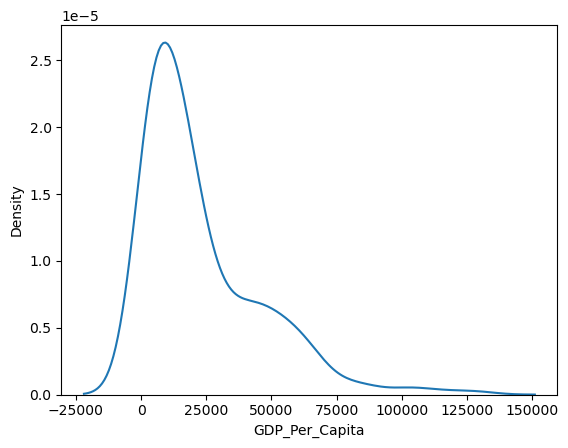

In [21]:
sns.kdeplot(gdp_df_clean_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

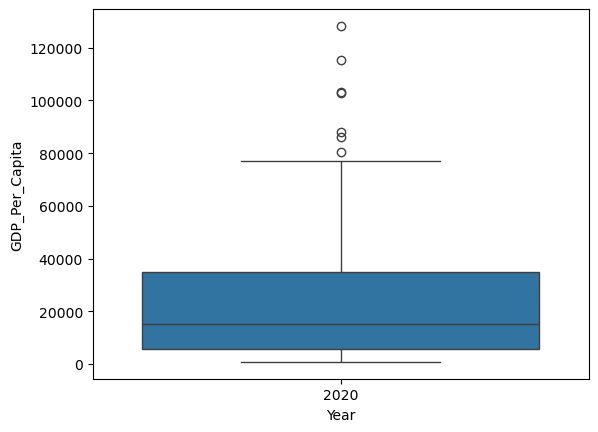

In [22]:
sns.boxplot(x=gdp_df_clean_2020['Year'],y=gdp_df_clean_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

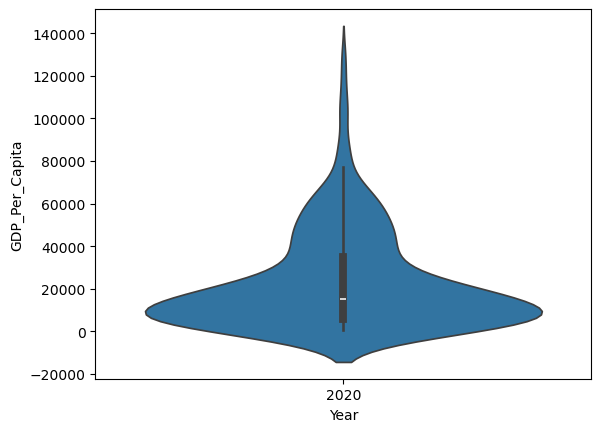

In [23]:
sns.violinplot(x=gdp_df_clean_2020['Year'],y=gdp_df_clean_2020['GDP_Per_Capita'])

All of the plots demonstrate that the gdp data is skewed heavily toward the lower end of the gdp scale.  The box plot shows the discrete outliers (there appears to be seven).  The density plot is the best to use when considering percentages because the area of the entire plot is 1.  The violin plot illustrates how heavily the data skews toward the lower values.  The histogram puts the data into countable buckets, which are easy to interpret.  

9. What was the median GDP per capita value in 2020?

In [26]:
median_gdp_per_capita_2020=gdp_df_clean_2020['GDP_Per_Capita'].median()
print(median_gdp_per_capita_2020)

15309.23598817024


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [28]:
decades=[1990,2000,2010,2020]
gdp_decades=gdp_df_clean[gdp_df_clean['Year'].isin(decades)]
gdp_decades.head(10)


,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
47,Africa Eastern and Southern,2000,3176.568655
57,Africa Eastern and Southern,1990,3386.854480
61,Africa Western and Central,2020,4622.731427
71,Africa Western and Central,2010,4343.405839
81,Africa Western and Central,2000,3139.324872


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

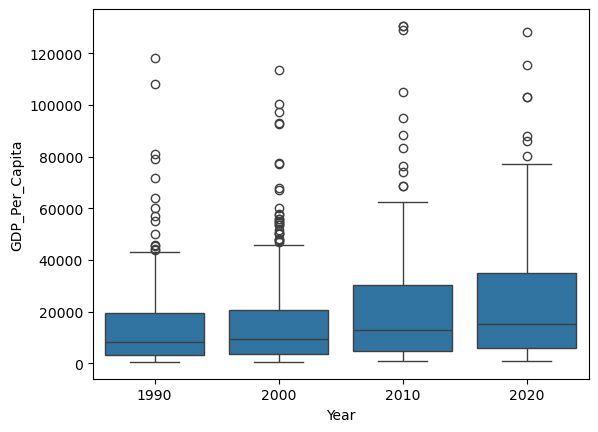

In [29]:
sns.boxplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

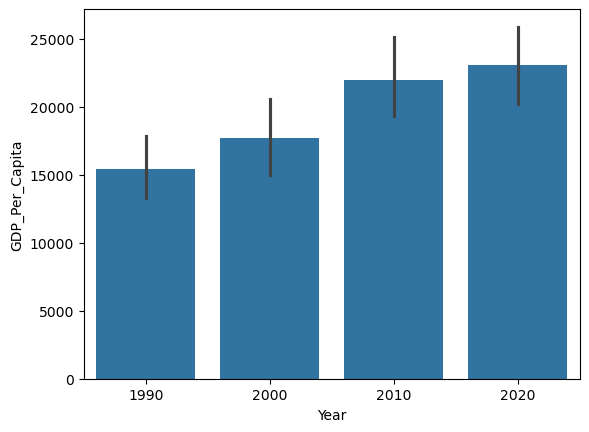

In [30]:
sns.barplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

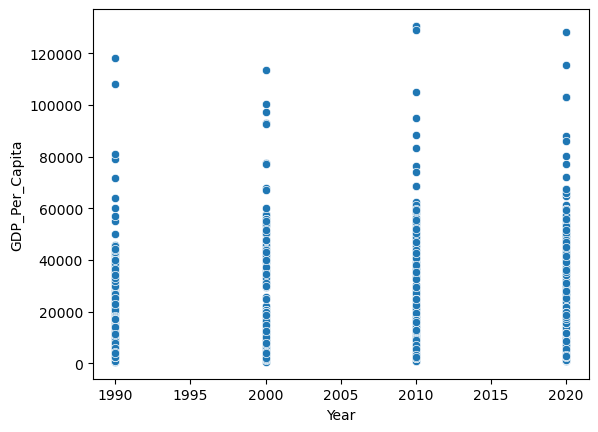

In [31]:
sns.scatterplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

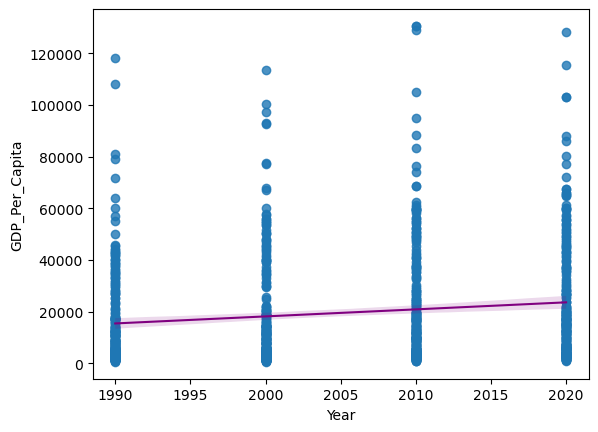

In [32]:
sns.regplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'],line_kws={'color':'purple','linewidth':1.5})

Box and whisker plot - This plot shows that the outliers all lie at the upper end of the data. It also makes the number of outliers the clearest of the four graph types.

Bar graph with error bars - You can easily see the increasing trend of gdp per capita over the decades along with the relative change in the gdp values.

Scatterplot - This plot shows the concentration of data points at the lower end of the gdp scale.  However, the trendline needs to be added in order to determine that the gdp increases over time.


In [34]:
print(gdp_df_clean.info())

gdp_df_over100K=gdp_df_clean.query('GDP_Per_Capita>100000')
gdp_df_over100K.sort_values('Year')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB
None


,Country,Year,GDP_Per_Capita
7827,United Arab Emirates,1990,108057.042464
974,Brunei,1990,118163.683198
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
7825,United Arab Emirates,1992,101100.487512
...,...,...,...
6116,Qatar,2023,116159.142559
4457,"Macao SAR, China",2023,104961.643485
6511,Singapore,2023,127543.554752
4423,Luxembourg,2023,130373.477942


Both the United Arab Emirates and Brunei had a per capita GDP over $100K in the year 1990.  These were the earliest cases.

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [37]:
gdp_df_clean_2020.sort_values('GDP_Per_Capita',ascending=False)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341
6514,Singapore,2020,115304.149459
6119,Qatar,2020,103061.913414
3493,Ireland,2020,102989.787335
741,Bermuda,2020,87894.401174
...,...,...,...
5133,Mozambique,2020,1466.124765
6699,Somalia,2020,1396.053436
1734,Dem. Rep. Congo,2020,1277.632863
1302,Central African Republic,2020,1136.570530


Luxembourg had the highest GDP per capita in 2020 with $128256 per person.

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

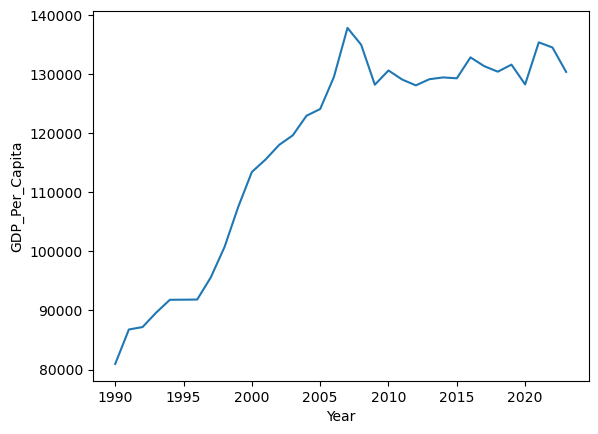

In [39]:
luxembourg_gdp=gdp_df_clean.query("Country=='Luxembourg'")
sns.lineplot(x=luxembourg_gdp['Year'],y=luxembourg_gdp['GDP_Per_Capita'])

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [41]:
gdp_df_clean_2020.sort_values('GDP_Per_Capita',ascending=True)

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

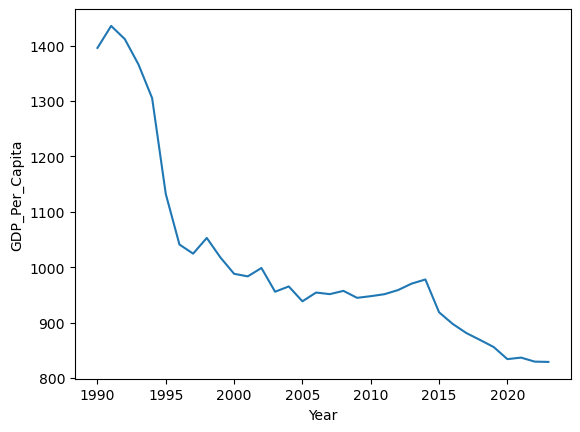

In [42]:
burundi_gdp=gdp_df_clean.query("Country=='Burundi'")
sns.lineplot(x=burundi_gdp['Year'],y=burundi_gdp['GDP_Per_Capita'])

In [43]:
gdp_df_clean_1990=gdp_df_clean.query('Year==1990')
gdp_df_clean_2000=gdp_df_clean.query('Year==2000')
#num_country_greater_1990_gdp=

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [45]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=6083)

In [46]:
internet_df.head()
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [47]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


In [48]:
del internet_df['Value Footnotes']
internet_df_clean=internet_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'Internet_Users_Pct'})


In [49]:
internet_df_clean.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [50]:
internet_df_clean.tail()

,Country,Year,Internet_Users_Pct
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739
6082,Zimbabwe,1990,0.000000


16. Look at the number of observations in this dataset per year. What do you notice?

In [52]:
internet_df_clean['Year']=internet_df_clean['Year'].astype(int)

In [53]:
internet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6083 non-null   object 
 1   Year                6083 non-null   int32  
 2   Internet_Users_Pct  6083 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 118.9+ KB


In [54]:
internet_df_yr_count=internet_df_clean['Year'].value_counts(ascending=True)

In [55]:
internet_df_yr_count.head()

Year
2023    11
1991    39
1992    50
1993    66
1994    92
Name: count, dtype: int64

The number of observations was relatively small in the early 1990s.  However, it appears that someone entered 0 for most if not all countries for the year 1990.

17. What is the first year to have a non-zero internet users percentage value?

In [58]:
internet_df_clean_nonzero=internet_df_clean.query('Internet_Users_Pct>0.0').sort_values('Year',ascending=True)

In [59]:
internet_df_clean_nonzero.head(10)

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369
2829,Italy,1990,0.017545
543,Belgium,1990,0.001007
5810,United States,1990,0.784729
2192,Germany,1990,0.125892
5777,United Kingdom,1990,0.087355


1990 is the first year in the dataframe with nonzero percentage of internet users.  

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [62]:
two_yrs=[2000,2014]
internet_two_yrs=internet_df_clean[internet_df_clean['Year'].isin(two_yrs)]
internet_two_yrs.head()

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.000000
28,Albania,2014,54.300000
42,Albania,2000,0.114097
57,Algeria,2014,29.500000
71,Algeria,2000,0.491706


In [63]:
avg_2014=internet_two_yrs[internet_two_yrs['Year']==2014]['Internet_Users_Pct'].mean()
print(avg_2014)

45.604924852941174


In [64]:
avg_2000=internet_two_yrs[internet_two_yrs['Year']==2000]['Internet_Users_Pct'].mean()
print(avg_2000)

9.332385498619049


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

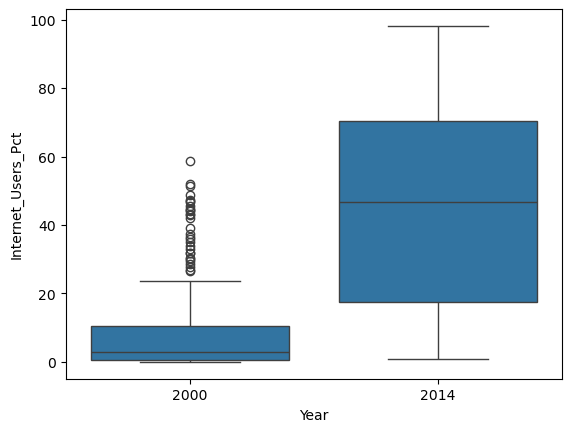

In [65]:
sns.boxplot(x=internet_two_yrs['Year'],y=internet_two_yrs['Internet_Users_Pct'])

The percentage of internet users grew significantly between 2000 and 2014 as shown on the boxplot.  Comparing the average percentage in the two years shows that it increased from 9.3% in 2000 to 45.6% in 2014.



19. For how many countries was the percentage of internet users below 5% in 2014?

In [68]:
count_below_5pct_2014=len(internet_two_yrs[(internet_two_yrs['Year']==2014) &(internet_two_yrs['Internet_Users_Pct']<5.0)]['Country'])
print(count_below_5pct_2014)

10


There are 10 countries with % of internet users below 5% in 2014.

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.


In [71]:
gdp_and_internet_use=pd.merge(gdp_df_clean,internet_df_clean,how='outer')

In [72]:
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9499 entries, 0 to 9498
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             9499 non-null   object 
 1   Year                9499 non-null   int64  
 2   GDP_Per_Capita      8219 non-null   float64
 3   Internet_Users_Pct  6083 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 297.0+ KB


In [73]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891


In [74]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9494,Zimbabwe,2019,3294.806084,26.5883
9495,Zimbabwe,2020,2987.269823,29.2986
9496,Zimbabwe,2021,3184.785451,32.4616
9497,Zimbabwe,2022,3323.121932,32.5615
9498,Zimbabwe,2023,3442.251327,NaN



21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

AND-----------

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.


In [76]:
gdp_and_internet_use_2014=gdp_and_internet_use[gdp_and_internet_use['Year'].isin([2014])]
gdp_and_internet_use_2014.head()
highest_internet_use=gdp_and_internet_use_2014.sort_values(['Internet_Users_Pct'],ascending=False).head(3)
print(highest_internet_use)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
3944                      Iceland  2014    57981.199448              98.158
2867  Falkland (Malvinas) Islands  2014             NaN              97.600
824                       Bermuda  2014    92298.387811              96.800


The 3 countries with the highest percentage of internet users in 2014 are Iceland, Falkland Islands, and Bermuda.

In [78]:
gdp_and_internet_use_3countries=gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland','Falkland (Malvinas) Islands','Bermuda'])]

In [79]:
gdp_and_internet_use_3countries.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
800,Bermuda,1990,79109.890650,0.0
801,Bermuda,1991,75754.494259,NaN
802,Bermuda,1992,75160.932166,NaN
803,Bermuda,1993,76883.813796,NaN
804,Bermuda,1994,76850.912239,NaN


In [80]:
gdp_and_internet_use_3countries=gdp_and_internet_use_3countries.dropna(subset=['GDP_Per_Capita'])

In [81]:
gdp_and_internet_use_3countries.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3949,Iceland,2019,65065.905682,99.5049
3950,Iceland,2020,59575.190393,99.5328
3951,Iceland,2021,61685.835611,99.6870
3952,Iceland,2022,65563.920870,99.8565
3953,Iceland,2023,66880.065810,NaN


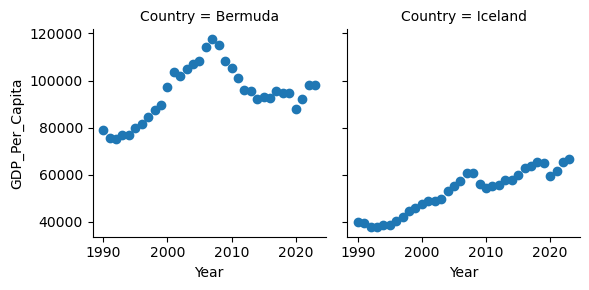

In [82]:
graph_3countries=sns.FacetGrid(gdp_and_internet_use_3countries,col='Country')
graph_3countries.map(plt.scatter,'Year','GDP_Per_Capita')
plt.show()

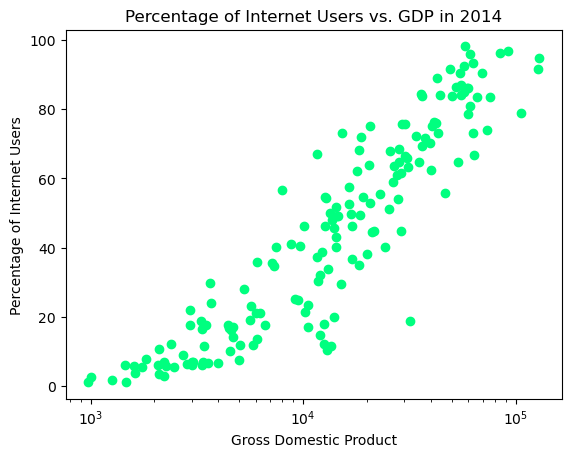

In [150]:
plt.scatter(gdp_and_internet_use_2014['GDP_Per_Capita'],gdp_and_internet_use_2014['Internet_Users_Pct'],color='springgreen')
plt.xscale('log')
plt.xlabel('Gross Domestic Product')
plt.ylabel('Percentage of Internet Users')
plt.title('Percentage of Internet Users vs. GDP in 2014')
plt.show()

Generally, there is a positive correlation between GDP and the percent of internet users in a country in 2014.  It is not a linear relationship.  It appears to be a logarithmic relationship.  

In [160]:
unusual_point_2014=gdp_and_internet_use_2014[(gdp_and_internet_use_2014['GDP_Per_Capita']>20000)&(gdp_and_internet_use_2014['Internet_Users_Pct']<25)]

In [162]:
print(unusual_point_2014)

                Country  Year  GDP_Per_Capita  Internet_Users_Pct
2538  Equatorial Guinea  2014    31765.899706               18.86


Equatorial Guinea has a lower percebntage of internet users than most countries with similar GDP values in 2014.